# Subset discontinuity tracking
This deck contains proofing of subset splitting methodologies

In [ ]:
# preamble

import matplotlib.pyplot as plt
from pathlib import Path
from crosspy import DIC, Imset
import os

# folder path

folder_path=Path(r'D:\DIC\crosspy\data\Ben')
Images = Imset(folder_path,'tif')

# first pass settings

filter_settings=[4,2,15,8]
roi_1stpass = dict(size_pass = 200, overlap_percentage = 70, xcf_mesh=250)

# first pass

dic_1stpass = DIC(Images,roi_1stpass,filter_settings)
dic_1stpass.run_sequential()

# image correct

dic_1stpass_corrected = dic_1stpass.correct()

# save data for late use



Found 2 images
Running sequential DIC on image pair 1 of 1 ...


C:\Users\Alex\Anaconda3\envs\crosspy2\lib\site-packages\crosspy\XCF.py:186: RuntimeWarning: overflow encountered in matmul
  arg3=kernr@kern@kernc


... Completed in (s) 172.38134789466858
Correcting images based on DIC results ...


## Step 1 : identify subsets with kinematic discontinuities
Subsets with discontinuities may be identified by peak heigh mistmatch, extreme displacements

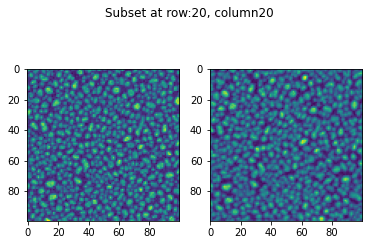

In [41]:
# settings for heaviside pass

roi_disc = dict(size_pass = 100, overlap_percentage = 70, xcf_mesh=250)
dic_disc = DIC(dic_1stpass_corrected, roi_disc,filter_settings)

# Function to plot selected subsets

def get_subsets(ims, row=0, col=0, roi_settings=None):
    if roi_settings==None:
        roi_settings = dict(
            size_pass = 100, 
            overlap_percentage = 70, 
            xcf_mesh=250)
    x0 = (col) * roi_settings['size_pass']
    x1 = x0 + roi_settings['size_pass']
    y0 = (row) * roi_settings['size_pass']
    y1 = y0 + roi_settings['size_pass']
    
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Subset at row:{}, column{}'.format(row,col))
    images = []
    for i in range(0,ims.shape[2]):
        images.append(axs[i].imshow(ims[x0:x1, y0:y1, i]))
        
    subsets = images[x0:x1, y0:y1, :]
    return subsets
    
# Select a subset, here at row 20, column 20

get_subset(dic_1stpass_corrected,20, 20)


We now have to use a function to identify discontinuities

In [ ]:
def id_disc(subsets):
    

## Step 2 : fit straight discontinuity

In [ ]:
# function to minimise

## Step 3 : obtain kinematic shifts

In [5]:
from scipy.optimize import minpack2

ImportError: DLL load failed: The file cannot be accessed by the system.

## Step 4 : apply shifts to d maps